In [2]:

import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [3]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [13]:
train_dir = '/home/akogo/Desktop/SIgnLInk/archive/asl_dataset/asl_dataset/'
labels = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d',
          'e','f','g','h','i','j','k','l','m','n','o','p','q','r',
          's','t','u','v','w','x','y','z']

In [20]:


labels = os.listdir(train_dir)


In [21]:
# Initialize lists
X_train = []
y_train = []
X_valid = []
y_valid = []

# Loop through the labels and load images
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    for file in os.listdir(folderpath)[0:60]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[60:70]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_valid.append(np.array(img))
        y_valid.append(i)

# Convert lists to NumPy arrays after data is appended
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

# Print the shapes of the arrays
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(2160, 224, 224, 3)
(2160,)
(355, 224, 224, 3)
(355,)


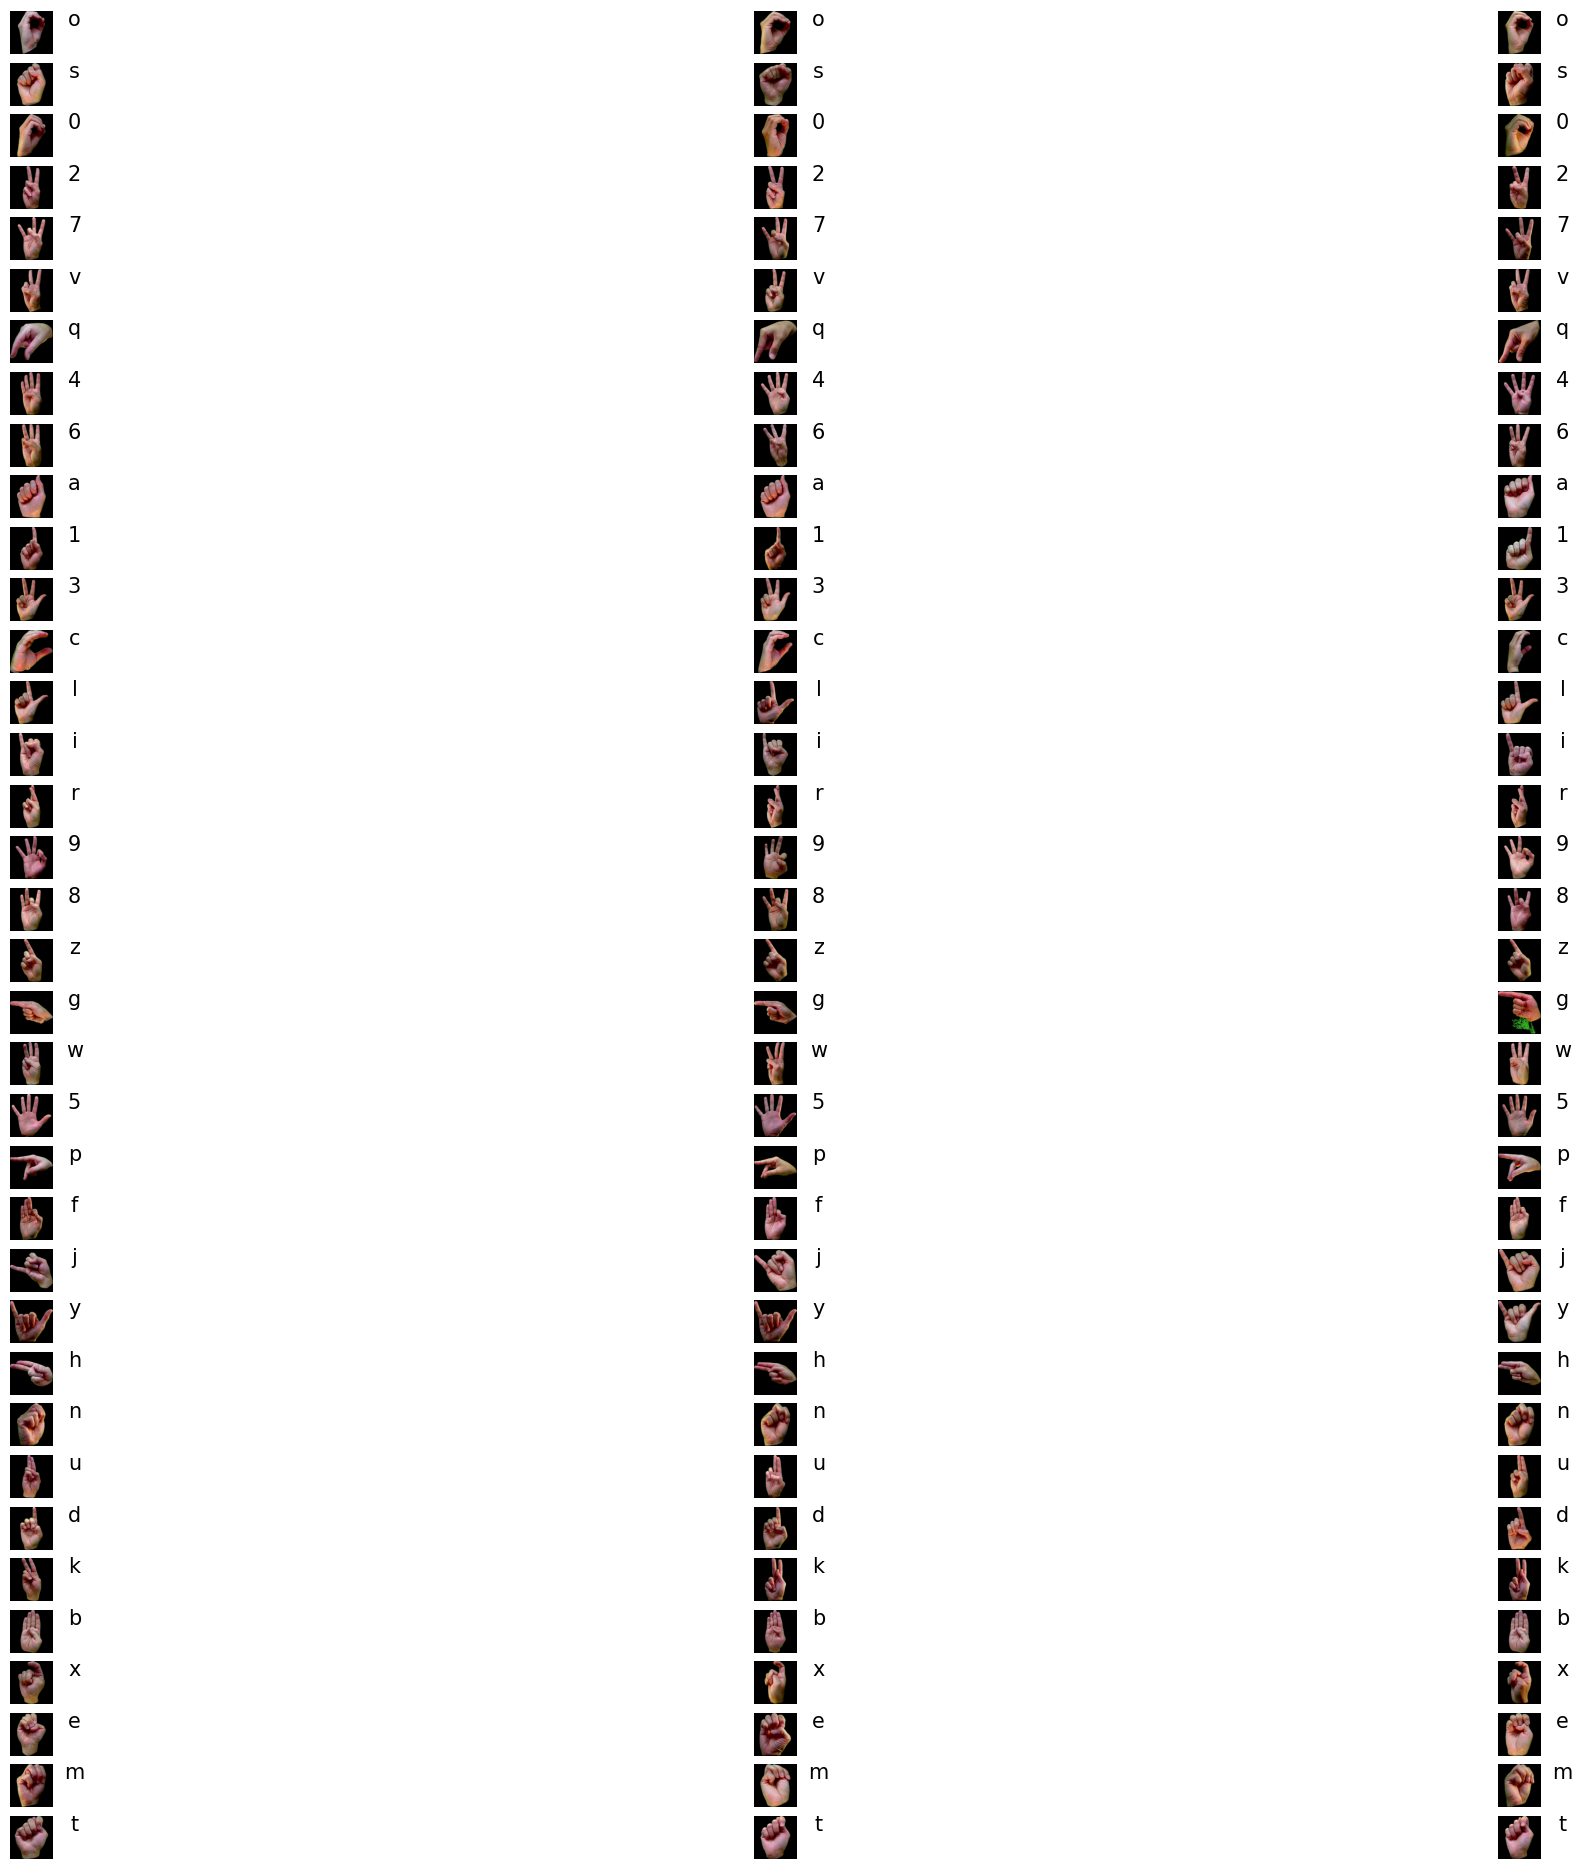

In [22]:
# display 3 random images with their labels
fig, axes = plt.subplots(nrows=len(labels), ncols=3, figsize=(24, 24))
fig.subplots_adjust(wspace=1)
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    img_names = os.listdir(folderpath)[:3]
    for j, img_name in enumerate(img_names):
        img_path = folderpath + img_name
        img = plt.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].text(1.5, 0.8, label[-1], fontsize=15, ha='center', va='center', transform=axes[i, j].transAxes)
plt.show()

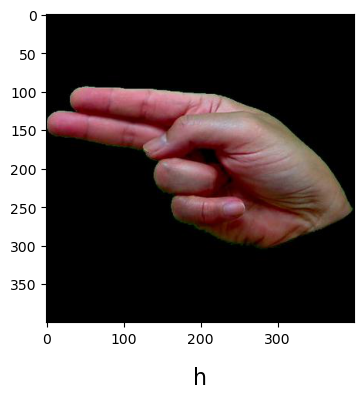

In [23]:


# choose a random label and a random image from the label folder
label = random.choice(labels) 
folderpath = train_dir + label + '/'
img_names = os.listdir(folderpath)[:3]
img_name = random.choice(img_names)  

# display the image with its label
fig, ax = plt.subplots(figsize=(4, 4))
img_path = folderpath + img_name
img = plt.imread(img_path)
ax.imshow(img)
ax.text(0.5, -0.2, label, fontsize=16, ha='center', transform=ax.transAxes)

plt.show()



In [24]:


# define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), 
    Dense(128, activation='relu'), #FC layer
    Dropout(0.5),
    Dense(len(labels), activation='softmax') # last dense layer (the classifier)
])



/home/akogo/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-21 01:28:19.182449: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.
2024-09-21 01:28:22.933073: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.
2024-09-21 01:28:22.962808: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.


In [25]:


# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [26]:
# define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [ ]:
# train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop])

2024-09-21 01:29:27.777903: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 325140480 exceeds 10% of free system memory.


Epoch 1/50


2024-09-21 01:29:33.311904: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44302336 exceeds 10% of free system memory.


In [4]:

# 2. Import necessary libraries
import numpy as np
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.models import load_model
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
          'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
          'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
          'u', 'v', 'w', 'x', 'y', 'z']

# 3. Load the model
model_path = 'sign_language_model.h5'
model = load_model(model_path)

# 4. Load and preprocess an image
img_path = '/home/akogo/Desktop/SIgnLInk/archive/asl_dataset/2/hand1_2_left_seg_2_cropped.jpeg'
img = cv.imread(img_path)
img = cv.resize(img, (224, 224))  # Resize to match model input size
img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

# 5. Run inference
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)
# Predicted class
predicted_class = np.argmax(predictions, axis=1)
predicted_label = labels[predicted_class[0]]


# 6. Print the predicted class
print(f'Predicted class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted class: u
